# Importando bibliotecas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import seaborn as sns

# Importando o arquivo

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df_val = df.iloc[:10]
df_val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


* Retirando o CustomerID

In [5]:
df.drop('customerID', 1, inplace = True)

* Verificando tipos

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Alterando MonthlyCharges

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

* verificando campos vazios

In [11]:
print(df.TotalCharges.isna().sum())
df[df.TotalCharges.isna()]

11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* Excluindo campos vazios de TotalCharges

In [12]:
df.dropna(subset = ['TotalCharges'], inplace = True)

**Gráfico de análise de tenure**
* Tenure é o tempo de duração do cliente na empresa

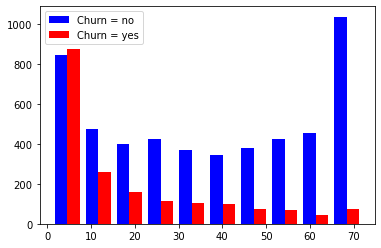

In [14]:
dfno = df[df.Churn == 'No'].tenure
dfyes = df[df.Churn == 'Yes'].tenure

plt.hist([dfno, dfyes], color = ['blue', 'red'], label = ['Churn = no', 'Churn = yes'])
plt.legend();

Muito Churn no início, com o passar do tempo, maior a probabilidade de fidelidade

**Gráfico de análise de dependentes**

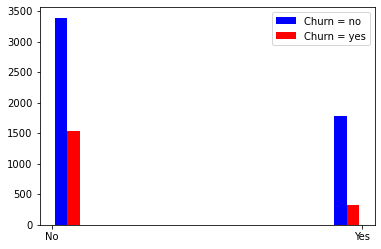

In [15]:
dfno = df[df.Churn == 'No'].Dependents
dfyes = df[df.Churn == 'Yes'].Dependents

plt.hist([dfno, dfyes], color = ['blue', 'red'], label = ['Churn = no', 'Churn = yes'])
plt.legend();

Aparentemente os dependentes não influenciam o Churn

**Gráfico de análise de cobrança**

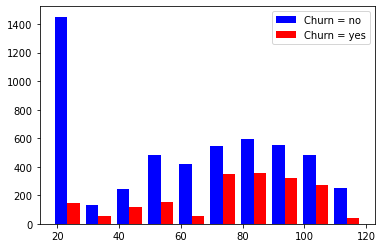

In [16]:
dfno = df[df.Churn == 'No'].MonthlyCharges
dfyes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([dfno, dfyes], color = ['blue', 'red'], label = ['Churn = no', 'Churn = yes'])
plt.legend();

Cobranças mais caras resultando em maior taxa de Churn

**Balanceamento do Dataset**

Yes: 1869
NO: 5163
NO (%): 26.58


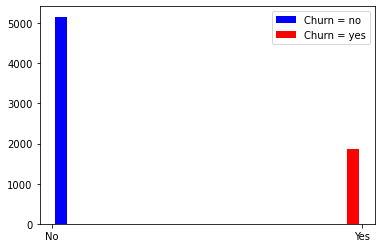

In [29]:
dfno = df[df.Churn == 'No'].Churn
dfyes = df[df.Churn == 'Yes'].Churn

total = dfno.count() + dfyes.count()
percent = round((dfyes.count() / total) * 100, 2)

print(f'Yes: {dfyes.count()}')
print(f'NO: {dfno.count()}')
print(f'NO (%): {percent}')

plt.hist([dfno, dfyes], color = ['blue', 'red'], label = ['Churn = no', 'Churn = yes'])
plt.legend();

26% representa um modelo razoavelmente balanceado

## Verificando padrão nos campos

In [30]:
for i in df:
    if df[i].dtypes == 'object':
        print(f'{i}: {df[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
df.replace('No internet service', 'No', inplace = True)

In [37]:
df.replace('No phone service', 'No', inplace = True)

In [38]:
for i in df:
    if df[i].dtypes == 'object':
        print(f'{i}: {df[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## Codificando Dummies

In [39]:
df_num = pd.get_dummies(
    data = df,
    columns = [
        'gender',
        'InternetService',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod'
    ]
)
df_num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_

In [40]:
df_num.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1967,0,69,78.60,5356.45,Yes,0,1,1,0,0,...,1,0,1,0,0,1,0,1,0,0
333,0,7,73.85,511.25,Yes,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4558,1,27,85.25,2287.25,Yes,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
1894,0,46,43.95,2007.85,No,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
1346,0,14,87.25,1258.60,Yes,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0


## Label encoder

In [41]:
le = LabelEncoder()
df_num.Churn = le.fit_transform(df_num.Churn)
df_num.Churn.sample(15)

5458    1
5467    0
6732    0
6317    1
4994    1
1301    0
3951    0
654     1
105     0
4479    0
5548    0
2433    0
6349    0
3469    0
3056    0
Name: Churn, dtype: int32

* Ajustando a escala

In [42]:
scaler = MinMaxScaler()
df_num[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_num[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_num.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5001,0,0.253521,0.365672,0.118590,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
6920,0,0.366197,0.014428,0.056601,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2534,0,0.957746,0.885075,0.842176,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
4995,0,0.084507,0.565672,0.061637,1,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
6003,0,0.985915,0.745771,0.748598,0,1,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0


# Separando Features e Labels

In [43]:
features = df_num.drop(['Churn'], 1)
label = df_num.Churn

**Separando Validação**

In [44]:
val = features.head(10)
val

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0,0.098592,0.809950,0.092511,1,0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6,0,0.295775,0.704975,0.222779,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
7,0,0.126761,0.114428,0.032668,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
8,0,0.380282,0.861194,0.349325,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
9,0,0.859155,0.377114,0.400317,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


* Novas features

In [45]:
features = features.iloc[10:]
label = label.iloc[10:]

# Separação em treino e teste

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = .2, random_state = 42)

In [52]:
model = Sequential([
    Dense(20, input_shape = (X_train.shape[1], ), activation = 'relu'),
    Dense(52, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

*Parametros de execução*

In [53]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Treinamento**

In [56]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8278
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8271
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8286
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8277
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8282
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8298
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8268
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8278
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8293
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3579 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8513: 0s - loss: 0.3184 - accuracy
Epoch 79/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8524: 0s - loss: 0.3064 - accura
Epoch 80/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8496
Epoch 81/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 0.8515
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8547
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3100 - accuracy: 0.8503
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.8547: 0s - loss: 0.3079 - accuracy: 0.
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.8483
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3086 - accuracy: 0.8524
Epo

In [58]:
pred_val = model.predict(val)
print(pred_val)

[[1.5616035e-01]
 [3.0672550e-04]
 [3.9517391e-01]
 [6.7180617e-09]
 [3.9879018e-01]
 [9.1733038e-01]
 [1.9690856e-01]
 [1.4247233e-01]
 [7.5317574e-01]
 [2.3353270e-08]]


In [59]:
y_pred = []
for i in pred_val:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
cliente = df_val.customerID
real = df_val.Churn
pred = list(pred_val.flatten())

df = pd.DataFrame({'cliente': cliente, 'previsao': pred, 'real': real, 'churn': y_pred})

In [60]:
print(df)

      cliente      previsao real  churn
0  7590-VHVEG  1.561604e-01   No      0
1  5575-GNVDE  3.067255e-04   No      0
2  3668-QPYBK  3.951739e-01  Yes      0
3  7795-CFOCW  6.718062e-09   No      0
4  9237-HQITU  3.987902e-01  Yes      0
5  9305-CDSKC  9.173304e-01  Yes      1
6  1452-KIOVK  1.969086e-01   No      0
7  6713-OKOMC  1.424723e-01   No      0
8  7892-POOKP  7.531757e-01  Yes      1
9  6388-TABGU  2.335327e-08   No      0


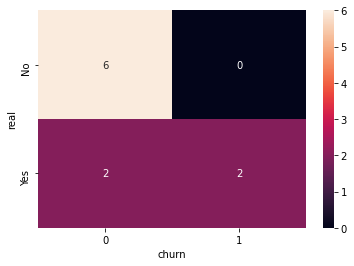

In [63]:
df = pd.DataFrame(df, columns = ['real', 'churn'])
confusion_matrix = pd.crosstab(df.real, df.churn, rownames = ['real'], colnames = ['churn'])

sns.heatmap(confusion_matrix, annot = True);